In [188]:
import numpy as np
import matplotlib.pyplot as plt

$$w_x(t_k) = \frac{1}{h^2}\cdot (x_{k+1} - 2\cdot x_k + x_{k - 1}) - \frac{dV}{dx}(x_k, y_k)$$

In [189]:
def Wx(dt, x, y):
    return (x[2:] - 2 * x[1:-1] + x[:-2]) / (dt ** 2) - gvx(x[1:-1], y[1:-1])

$$w_y(t_k) = \frac{1}{h^2}\cdot (y_{k+1} - 2\cdot y_k + y_{k-1}) - \frac{dV}{dy}(x_k, y_k)$$

In [190]:
def Wy(dt, x, y):
    return (y[2:] - 2 * x[1:-1] + x[:-2]) / (dt ** 2) - gvy(x[1:-1], y[1:-1])

$$W(t) = W_x^2(t) + W_y^2(t)$$

In [191]:
def W(dt, x, y):
    return Wx(dt, x, y) ** 2 + Wy(dt, x, y) ** 2

$$\tau = \sum_{k=1}^{n-1}2hW(t_k)$$

In [192]:
def tau(h, x, y, w):
    return np.sum(2 * h * w(h, x[1:-1], y[1:-1]))

$$L = \sum_{t_k}W(t_k) = \sum_KhW(K)$$

In [193]:
def L(h, w):
    return np.sum(h * w)

$$\frac{d\tau}{dx_k} = 4h\cdot \bigg(W_x(t_k)\cdot (-\frac{2}{h}-\frac{d^2V}{dx^2}(x_k,y_k)) + \frac{W_x(t_{k-1}) + W_x(t_{k+1})}{h^2} + W_y(t_k)\cdot \frac{dV}{dxdy}(x_k, y_k)\bigg)$$

In [194]:
def gtaux(h, x, y, wx, wy, d2vx, dvxy):
    # without shift
    wos = wx[1:-1] * (-2/(h ** 2) - d2vx(x[1:-1], y[1:-1]))
    # with shift
    ws = (wx[:-2] + wx[2:]) / (h ** 2)
    # wy part
    yp = wy[1:-1] * dvxy(x[1:-1], y[1:-1])

    return 4 * h * (wos + ws + yp)

$$\frac{d\tau}{dy_k} = 4h\cdot \bigg(W_y(t_k)\cdot (-\frac{2}{h^2} - \frac{d^2V}{dy^2}(x_k, y_k)) + \frac{W_y(t_{k-1}) + W_y(t_{k + 1})}{h^2} + W_x(t_k)\cdot \frac{d^2V}{dydx}(x_k,y_k)\bigg)$$

In [195]:
def gtauy(h, x, y, wx, wy, d2vy, dvxy):
    # without shift
    wos = wy[1:-1] * (-2/(h ** 2) - d2vy(x[1:-1], y[1:-1]))
    # with shift
    ws = (wy[:-2] + wy[2:]) / (h ** 2)
    # wx part
    xp = wx[1:-1] * dvxy(x[1:-1], y[1:-1])

    return 4 * h * (wos + ws + xp)

$$V, \frac{dV}{dx}, \frac{dV}{dy}, \frac{d^2V}{dx^2}, \frac{d^2V}{dy^2}, \frac{d^2V}{dxdy}$$

In [196]:
###  V
def v(x, y):
    return np.sin(x) * np.sin(y)

# \frac{dv}{dx}
def dvdx(x, y):
    return np.cos(x) * np.sin(y)

# \frac{dv}{dy}
def dvdy(x, y):
    return np.sin(x) * np.cos(y)

# \frac{d^2 v}{dx^2}
def d2vdx(x, y):
    return -np.sin(x) * np.sin(y)

# \frac{d^2 v}{dy^2}
def d2vdy(x, y):
    return -np.sin(y) * np.sin(x)

# \frac{d^2 v}{dx \cdot dy}
def dvdxy(x, y):
    return np.cos(x) * np.cos(y)

### /V

def gvx(x, y): return dvdx(x, y)
def gvy(x, y): return dvdy(x, y)

In [197]:
EPS = 1e-8
DT = 1
LEN = 5

In [198]:
X0 = Y0 = 3 * np.pi / 2
X1 = Y1 = 5 * np.pi / 2

In [199]:
x0 = np.linspace(X0, X1, LEN)
y0 = np.linspace(Y0, Y1, LEN)

In [200]:
x,y = x0, y0

print(f'x = {x}')
print(f'y = {y}')

wx = Wx(DT, x, y)
wy = Wy(DT, x, y)
w = W(DT, x, y)

print(f'wx = {wx}')
print(f'wy = {wy}')
print(f'w = {w}')

l = L(DT, w)
print(f'L = {l}')

tx = np.zeros(x.shape)
ty = np.zeros(y.shape)
tx[1:-1] = gtaux(DT, x, y, wx, wy, d2vdx, dvdxy)
ty[1:-1] = gtauy(DT, x, y, wx, wy, d2vdy, dvdxy)
print(f'tx = {tx}')
print(f'ty = {ty}')

x = [ 4.71238898  5.49778714  6.28318531  7.06858347  7.85398163]
y = [ 4.71238898  5.49778714  6.28318531  7.06858347  7.85398163]
wx = [  5.00000000e-01   2.44929360e-16  -5.00000000e-01]
wy = [  5.00000000e-01   2.44929360e-16  -5.00000000e-01]
w = [  5.00000000e-01   1.19980783e-31   5.00000000e-01]
L = 1.0
tx = [  0.00000000e+00  -9.79717439e-16  -9.79717439e-16  -9.79717439e-16
   0.00000000e+00]
ty = [  0.00000000e+00  -9.79717439e-16  -9.79717439e-16  -9.79717439e-16
   0.00000000e+00]


In [201]:
ALPHA = -1e-2
def step(dt, x, y, d2vx, d2vy, dvxy):
    #print('**********************')
    
    #print(f'x = {x}')
    #print(f'y = {y}')
    
    wx = Wx(dt, x, y)
    wy = Wy(dt, x, y)
    w = W(dt, x, y)
    print(f'tau = {tau(dt, x, y, W)}')
    #print(f'wx = {wx}')
    #print(f'wy = {wy}')
    #print(f'w = {w}')
    
    l = L(dt, w)
    print(f'l = {l}')
    
    tx = np.zeros(x.shape)
    ty = np.zeros(y.shape)
    tx[1:-1] = gtaux(dt, x, y, wx, wy, d2vx, dvxy)
    ty[1:-1] = gtauy(dt, x, y, wx, wy, d2vy, dvxy)
    #print(f'tx = {tx}')
    #print(f'ty = {ty}')
    
    x1 = x - ALPHA * tx
    y1 = y - ALPHA * ty
    #print(f'x1 = {x1}')
    #print(f'y1 = {y1}')
    
    return (x1, y1)

In [202]:
def benchmark(maxiter, x0, y0, update):
    x = np.empty((maxiter,) + x0.shape)
    y = np.empty((maxiter,) + y0.shape)
    x[0] = x0
    y[0] = y0
    for k in range(1, maxiter):
        x[k], y[k] = update(x[k - 1], y[k - 1])
    return (x, y)

tau = 0.07788673858831907
l = 1.2254655188398396
tau = 0.06633867474539257
l = 1.1865685141042013
tau = 0.05855539233682119
l = 1.1523906929673369
tau = 0.05396632283777106
l = 1.1222960834619333
tau = 0.05208383658869432
l = 1.0957399504067649
tau = 0.052492583709860624
l = 1.0722560641641588
tau = 0.05483960100882884
l = 1.0514454163729912
tau = 0.05882538069318775
l = 1.032966357078028
tau = 0.06419596540230008
l = 1.0165260634849758


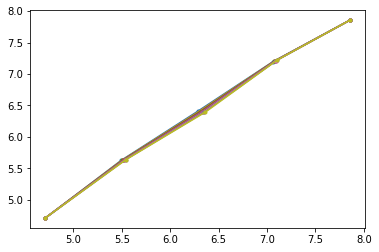

In [203]:
x, y = x0, y0
em = 1e-1
x[1:-1] = x[1:-1] + np.random.randn() * em
y[1:-1] = y[1:-1] + np.random.randn() * em
for i in range(1, 10):
    x, y = step(DT, x, y, d2vdx, d2vdy, dvdxy)
    plt.plot(x, y, '.-')
plt.show()
#maxiter = 30
#x1, y1 = benchmark(maxiter, x, y, lambda x0, y0: step(DT, x0, y0, d2vdx, d2vdy, dvdxy))